# Analysis of numpy.random Python Package
Author: David Maguire
***

In [1]:
#numpy
import numpy as np

#matplotlib pyplot
import matplotlib.pyplot as plt

#numpy.random default_rng
from numpy.random import default_rng

#numpy.random Generator, specific BitGenerators and Seed Sequence
from numpy.random import Generator, PCG64, MT19937, SeedSequence

In [2]:
# Set a style for all plots used below (Classic is useful as it shows line between histogram bins)
plt.style.use('classic')


***
# 1. numpy.random

<img src="https://i.etsystatic.com/19865200/r/il/302f10/1823805282/il_570xN.1823805282_7naf.jpg" width="600px">

https://numpy.org/doc/stable/reference/random/index.html [X]

[This earlier version [X]](https://numpy.org/doc/1.16/reference/routines.random.html) contains the older numpy.random functions but categorised in the same categories as this notebook on one page, so may be useful to look through

## 1.1 What is numpy.random?

NumPy is a Python package used for many scientific computing processes and the creating of **ndarrays** for data storage and analysis [X]. numpy.random is a package within NumPy that allows the generation of **pseudo random** numbers. The package allows one or more pseudo random numbers to be generation within a given range. numpy.random allows for **simple number generation** (Covered in section 2.1 of this workbook) as well as the randomisation of the **order** of an array of numbers (Section 2.2). Randoms numbers can be generated across a specific **distribution** (Section 3) and **seeds** can also be used to give reproducable results (Section 4).

## 1.2 Pseudo Random Number Generation

Computers cannot, strictly speaking, come up with truly random numbers. Computers use a **seed** to come up with a starting point for their random number generating process. If both the seed and the process for generating random numbers is known, then the results of the pseudo random number generation can be reproduced, making them not truly random. When no seed is given, computers will usually use **entropy** from the computer's Operating System in the form of heat or another measurable physical property to get a seed for the number generation process. With modern computers, this measurement would be almost impossible for a human to measure, thus making the psuedo random number generation very close to pure random.

In [3]:
# Seed Sequencing will be discussed in Section 4 but this code shows the size of the seed taken from this OS's entropy
entropy = np.random.SeedSequence().entropy

print("Seed taken from this OS's entropy: ", entropy)

Seed taken from this OS's entropy:  60927440421786200079200583169493612484


## 1.3 How does numpy.random work?

numpy.random uses 2 methods to generate random numbers. These are:

- [**BitGenerators [X]**](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator)  generate a sequence of 32 or 64 random bits

- [**Generators [X]**](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) transforms those random bits into numbers that follow a specific probability distribution (see section 3 for specific distributions)

Throughout this workbook, the [**default_rng**](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) function will be used. This uses the **PCG64** BitGenerator, however other BitGenerators can be used, such as the **MT19937** BitGenerator

More about the comparison of different BitGenerators can be found [**here [5]**](https://numpy.org/doc/stable/reference/random/performance.html)

In [4]:
# Assign different BitGenerators and default_rng
PCGrng = Generator(PCG64())
MTrng = Generator(MT19937())
rng = default_rng()

# Show bit generators assigned
# default_rng is PCG64 BitGenerator
print("PCGrng BitGenerator: ", PCGrng, "\n")
print("MTrng BitGenerator: ", MTrng, "\n")
print("default_rng BitGenerator: ", rng)

PCGrng BitGenerator:  Generator(PCG64) 

MTrng BitGenerator:  Generator(MT19937) 

default_rng BitGenerator:  Generator(PCG64)


In [5]:
# default_rng variable with seed to be used for all default_rng code below
rng = np.random.default_rng(2021)

#### NB: Seeds

For the seed used above, to repeat the same results while re-running a cell, the seed will have to be called again within the cell. This is because the seed allows for a set sequence of random numbers to be made. If the seed is called at the top of the cell, then the result will alway be the first output in the sequence (which will always be the same). Otherwise, the sequence will continue and different results will be outputted.

## 1.4 Generating Random Numbers Using numpy.random

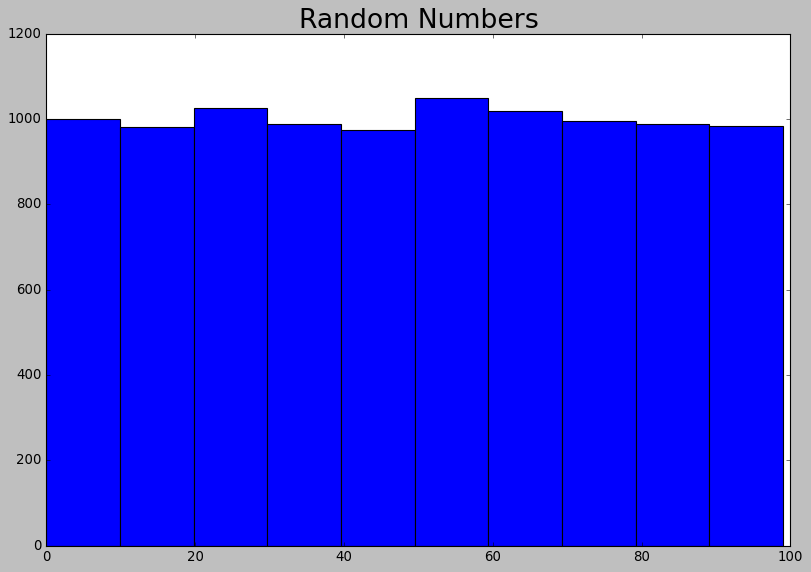

In [6]:
# Use integers fuction to get random integers in the given range and size
rarray = rng.integers(0,100,10000)

# Set size of plot, give title and show
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Random Numbers', fontsize = '24')
ax.hist(rarray)
plt.show;

#### Default_rng distribution
As shown by the plot above, the default distribution of default_rng is **uniform**, meaning that every number in the given range has the same probability of appearing.
More on Uniform distribution can be found in section 3.1.

***
# 2. Simple Random Data and Permutations

<img src="https://helloacm.com/wp-content/uploads/2020/07/string-shuffle.jpg" width="600px">

## 2.1 Simple Random Data
Simple random data in numpy.random is the use of a Generator to produce random data with no set distribution. In the newest version of numpy.random, there are 4 types of simple random data:

- [**integers [X]**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) produces random integers in a given range

- [**random [X]**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random) returns random floats between 0.0 and 1.0

- [**choice [X]**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) returns a random sample from a given array

- [**bytes [X]**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) returns random bytes



***

#### 2.1.1 Generator.integers

random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)


In [7]:
# If no high is given, first number is the high limit
intarray = rng.integers(10, size = 10)
print(intarray)

[2 0 9 0 0 9 1 9 4 2]


In [8]:
# If 2 numbers are given and no size, first number is low, second number is high
intarray = rng.integers(10, 20)
print(intarray)

19


In [9]:
# If 3 numbers are given, first number is low, second number is high, third is size
intarray = rng.integers(10, 20, 10)
print(intarray)

[13 19 18 19 16 13 14 10 12 12]


***

#### 2.1.2 Generator.random

random.Generator.random(size=None, dtype=np.float64, out=None)


In [10]:
# No input gives a random float between 0.0 and 1.0
randomarray = rng.random()
print(randomarray)

0.5003632947073116


In [11]:
# 1 input give an array of that size
randomarray = rng.random(10)
print(randomarray)

[0.89054481 0.98057857 0.90005737 0.23532271 0.15737052 0.56158699
 0.59658743 0.80212776 0.66535053 0.26410453]


In [12]:
# Floats can be in 64 or 32 bit
dtype64array = rng.random(10)
dtype32array = rng.random(10, dtype=np.float32)

# This function sets the precision to 20 to show the difference in bit size
np.set_printoptions(precision=20)

print("64 bit floats: ", dtype64array, "\n")
print("32 bit floats: ", dtype32array)

# Return to default (8) for rest of notebook
np.set_printoptions(precision=8)

64 bit floats:  [0.5054326218395753  0.933049411103887   0.7933489595065155
 0.6418055455738242  0.27771705604039676 0.8446636223661166
 0.12628349613168632 0.9836785997860784  0.5940809810415467
 0.7957437101708185 ] 

32 bit floats:  [0.9685929   0.2745881   0.25368595  0.49275756  0.3753847   0.63896656
 0.120945334 0.21731234  0.5208303   0.06515992 ]


***

#### 2.1.3 Generator.choice

random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

In [13]:
# Randomly chooses from an array
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices)
print(choicearray)

Pear


In [14]:
# Multiple choices can be made, choices by default can be made more than once
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 10)
print(choicearray)

['Apple' 'Orange' 'Apple' 'Pear' 'Pear' 'Apple' 'Pear' 'Banana' 'Pear'
 'Orange']


In [15]:
# Replace=False allows unique choices to be made only once, choices are shuffled by default
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 4, replace = False)
print(choicearray)

['Orange' 'Pear' 'Apple' 'Banana']


In [16]:
# Shuffle=False gives the choices in the same order as the given list
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 4, replace = False, shuffle=False)
print(choicearray)

['Apple' 'Banana' 'Orange' 'Pear']


In [17]:
# p allows a probability of each choice to be given (must add up to 1.0)
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 20, p=[0.7,0,0.2,0.1])
print(choicearray)

['Apple' 'Orange' 'Apple' 'Orange' 'Pear' 'Apple' 'Apple' 'Apple' 'Orange'
 'Pear' 'Apple' 'Orange' 'Pear' 'Apple' 'Apple' 'Apple' 'Apple' 'Pear'
 'Pear' 'Apple']


In [18]:
# An int can also be given to choose a range of 0:a
choicearray = rng.choice(a=10, size=5)
print(choicearray)

[5 0 3 1 8]


***

#### 2.1.4 Generator.bytes

random.Generator.bytes(length)

In [19]:
# Returns random bytes of length given
bytestring = rng.bytes(20)
print(bytestring)

b'\xb4`\xef\xda\xa2\xd90\xa3cD\xe9\x19d\x06\xbe!\xe6\xb8\xa4d'


## 2.2 Permutations

Permutation in numpy.random affect the **order** of the data given. TIn the newest version of numpy.random, there are 3 different ways of permutating data:

 - [shuffle [X]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) shuffles an array or sequence in-place changing the original array or sequence
 
 - [permutation [X]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) randomly permutes an array or sequence, returning a copy
 
 - [permutated [X]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) randomly permutes an array or sequence along an axis with each array being permuted independantly of the others

***

#### 2.2.1 Generator.shuffle

random.Generator.shuffle(x, axis=0)

In [20]:
# Create array from 1 to 9
array = np.arange(1,10)
print("Original array: ", array)

# Shuffles existing array
shuffle = rng.shuffle(array)

# This will not work as no copy was of array was made so shuffle is not assigned to anything
print(shuffle)

# Print shuffled array
print("Shuffled array: ", array)

Original array:  [1 2 3 4 5 6 7 8 9]
None
Shuffled array:  [9 3 6 8 1 2 7 4 5]


In [21]:
# Create array from 0 to 23 in 3x8 shape
array = np.arange(24).reshape((3,8))
print("Original array: \n", array)

# Position of smaller arrays are shuffle but order within those arrays stays the same
rng.shuffle(array)
print("Shuffled array: \n", array)

# Shuffle along axis shuffles the order within smaller array but not position in larger array
rng.shuffle(array, axis=1)
print("Shuffled array along axis: \n", array)

Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Shuffled array: 
 [[ 8  9 10 11 12 13 14 15]
 [ 0  1  2  3  4  5  6  7]
 [16 17 18 19 20 21 22 23]]
Shuffled array along axis: 
 [[11 12 15  9 10 14 13  8]
 [ 3  4  7  1  2  6  5  0]
 [19 20 23 17 18 22 21 16]]


***

#### 2.2.2 Generator.permutation

random.Generator.permutation(x, axis=0)

In [22]:
# Create array from 1 to 9
array = np.arange(1,10)
print("Original array: ", array)

# Permutation does not change order of original array like shuffle, instead a new array is created
permute = rng.permutation(array)
print("Original array after permutation: ", array)
print("New permutation: ", permute)

Original array:  [1 2 3 4 5 6 7 8 9]
Original array after permutation:  [1 2 3 4 5 6 7 8 9]
New permutation:  [8 3 5 9 4 6 1 7 2]


In [23]:
# Create array from 0 to 23 in 3x8 shape
array = np.arange(24).reshape((3,8))
print("Original array: \n", array)

# Permutations can also be performed via axes
permute = rng.permutation(array, axis=1)
print("Original array: \n", array)
print("Permuted array along axis: \n", permute)

Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Permuted array along axis: 
 [[ 0  1  6  4  3  2  7  5]
 [ 8  9 14 12 11 10 15 13]
 [16 17 22 20 19 18 23 21]]


#### NB. When using the shuffle / permutation functions along an axis, it should be noted that each array is shuffled / permuted in the same way. E.g., in the below 3x3 array:

[[1 2 3]

[4 5 6]

[7 8 9]]

If the  [1 2 3] array is shuffle / permuted into [3 2 1], then the [4 5 6] array will become [6 5 4] and the [7 8 9] will become [9 8 7].

This is important as it is in contrast to the Genorator.permuted function in section 2.2.3



***

#### 2.2.3 Generator.permuted

random.Generator.permuted(x, axis=None, out=None)

#### NB. Generator.permuted requires a newer version of numpy.random than 1.19. A new version may need to be installed

In [24]:
# Create array from 0 to 23 in 3x8 shape
array = np.arange(24).reshape((3,8))
print("Original array: \n", array)

# .permutated permutes axes independantly
permuted = rng.permuted(array, axis=1)
print("Original array: \n", array)
print("Permuted array along axis: \n", permuted)

Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Permuted array along axis: 
 [[ 7  6  3  4  2  0  5  1]
 [15 13  9 10 11 14 12  8]
 [18 22 21 19 20 23 17 16]]


#### The primary difference between .permuted and .shuffle / permutation is that axes are shuffled independantly of other axes. Also of note, .permuted can make a copy like .permutation (default) or permuted in place like .shuffle using the attribute out=x with x being the array being permuted:

In [25]:
# In place .permuted
# Create array from 0 to 23 in 3x8 shape
array = np.arange(24).reshape((3,8))
print("Original array: \n", array, "\n")

# .permutated with out= original array
rng.permuted(array, axis=1, out=array)
print("Original array (permuted): \n", array)

Original array: 
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 

Original array (permuted): 
 [[ 6  4  1  2  0  3  5  7]
 [11 10  8 15 14  9 12 13]
 [17 16 23 18 21 20 19 22]]


***
## 3. Distributions

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/normal-distribution.png" width="600px">

For each distribution in this section, an simple explanation of the distribution will be followed by code to make an array of the distribution and a histogram visuallising it.

Following that, the Probability Density/Mass Function for each distribution will be explained as well as the history of each distribution.

#### Note on Probability Mass / Density Functions
Probability mass / density functions are functions that give the probability that a random variable is close to or equal to a certain value. The difference between the 2 is that **probability mass functions** deal with **discrete values** (e.g. ints) [X] while **probability density functions** deal with **continuous values** (e.g. real numbers) [X].

### 3.1 Uniform Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

random.Generator.uniform(low=0.0, high=1.0, size=None)

A uniform distribution is what most people think of when they think of random numbers. A uniform distribution gives every number in a given range the same possibility of occuring.

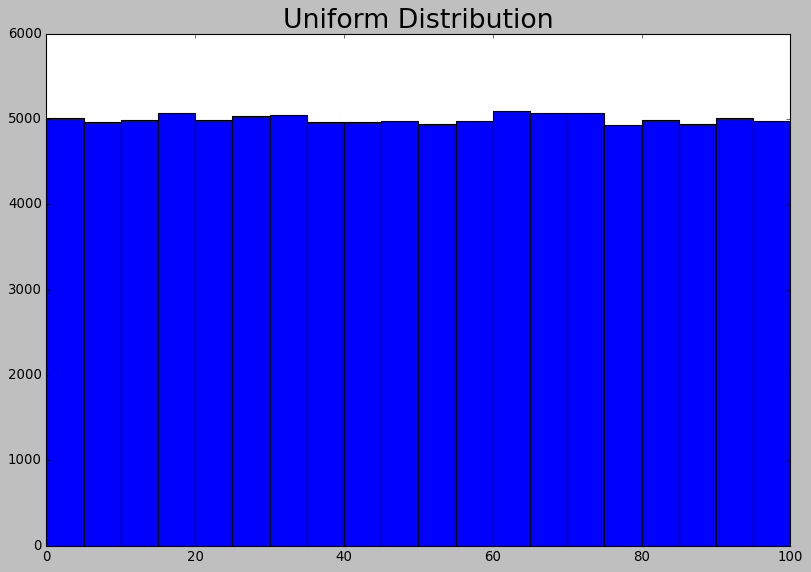

In [26]:
# Make a random array with the range 0 to 99 and 100000 elements in the uniform distribution (more elements gives a more even distribution)
uarray = rng.uniform(0,100,100000)

# Create, size, title and show histogram graph
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(uarray, bins = 20)
ax.set_title('Uniform Distribution', fontsize = '24')
plt.show;

### Probability Density Function of Uniform Distribution:

## $f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$

In the above function, *a* and *b* are the lower and upper bounds of the given *range*. Every number within the given range has an equal chance (1/range) of occuring. Any number outside the given range has 0 chance of occuring.

#### History of Uniform Distribution
It is difficult to determine the first use of the uniform distribution. It is similar to the term "equiprobability" which is used in Gerolamo Cardano's [*Liber de Ludo Aleae* [X]](https://www.sciencedirect.com/science/article/pii/S0315086004000400?via%3Dihub) which discussed probability in dice rolls.

***

### 3.2 Normal Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

random.Generator.normal(loc=0.0, scale=1.0, size=None)

A normal (also called Gaussian) distribution is often used to represent distributions that are commonly seen in the real world. It is often called *bell curve*.

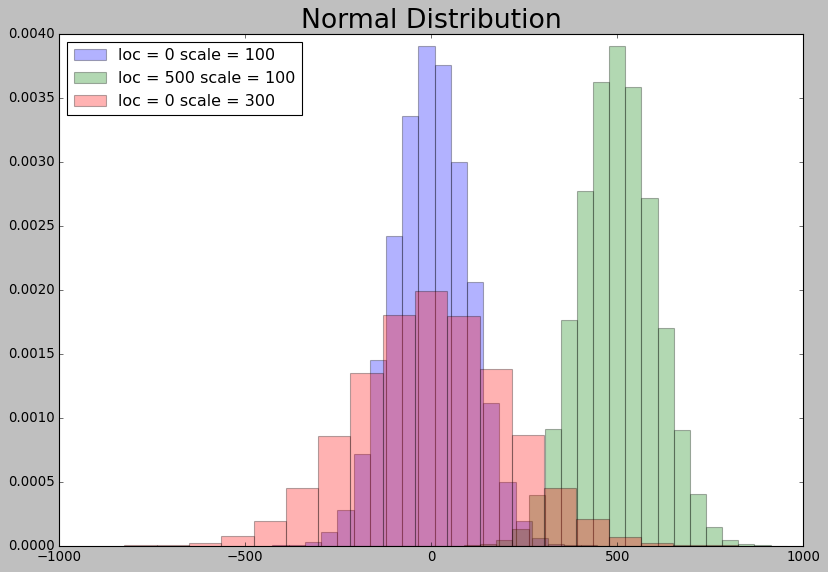

In [66]:
# Make random normally distributed arrays with varying locs and scales
normalarray = rng.normal(0,100,100000)
normalarray2 = rng.normal(500,100,100000)
normalarray3 = rng.normal(0,200,100000)

# Create figure
fig, ax = plt.subplots(figsize = (12,8))

# Create Histogram for each array, set alpha to make translucent, density = True allows for y axis to be the same for all histograms
ax.hist(normalarray, bins = 20, alpha = 0.3, label = "loc = 0 scale = 100", density = True)
ax.hist(normalarray2, bins = 20, alpha = 0.3, label = "loc = 500 scale = 100", density = True)
ax.hist(normalarray3, bins = 20, alpha = 0.3, label = "loc = 0 scale = 300", density = True)

# Title, legend and show graph
ax.set_title('Normal Distribution', fontsize = '24')
ax.legend(loc='upper left')
plt.show;

### Probability Density Function of Normal Distribution:

## ${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

In the above function, $\mu$ is *mean* of the distribution, $\sigma$ is the *standard deviation* of the distribution and $\sigma ^{2}$ is the *variance* of the distribution [X].

#### History of the Normal Distribution
The Normal distribution was first discovered by *Galileo Galilei* (1564-1642) who noticed that smaller atronomical observation errors were more common than larger ones and that they tended to be evenly distribution around a central value. A mathematical formula was developed by *Carl Friedrich Gauss* (1777-1855) and *Adrien-Marie Legendre* (1752-1833) which provided an explanation for the distribution of these errors; the **Normal Distribution** [[X]](https://www.encyclopedia.com/science-and-technology/mathematics/mathematics/normal-distribution#3)

***

### 3.3 Binomial Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

random.Generator.binomial(n, p, size=None)

The Binomial Distribution is a *discrete* probability distribution that shows the number of successes in an experiment of n trials with p probability. If p were to be 0.5 (50%), it would be similar to flipping a coin n times and showing the probability of total number of heads occuring. 

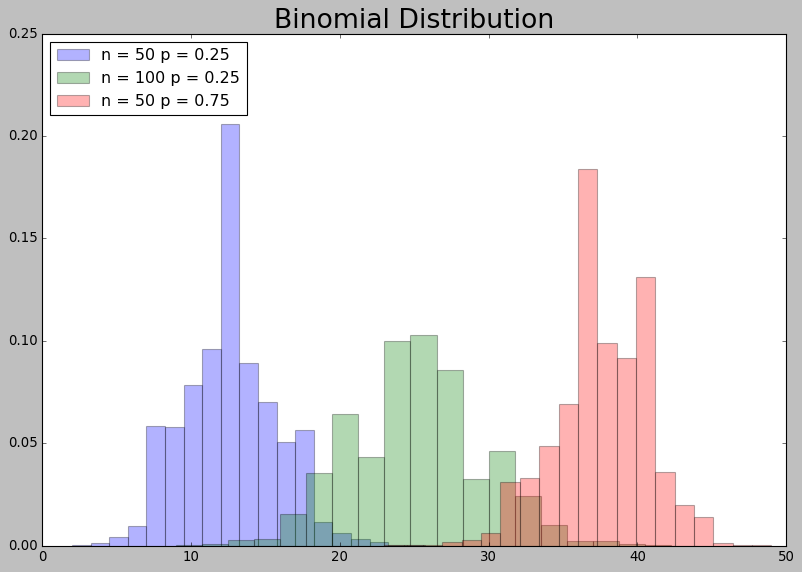

In [68]:
# n is number of trials, p is probability of success (1 = 100% chance of success)
n , p = 50, 0.25

# Create array of 100000 of success rate of 50 trials with a 25% chance of success in each
biarray = rng.binomial(n , p, 100000)
biarray2 = rng.binomial(n=100, p=0.25, size=100000)
biarray3 = rng.binomial(n=50 , p = 0.75, size=100000)

# Create figure
fig, ax = plt.subplots(figsize = (12,8))

# Create Histogram for each array, set alpha to make translucent, density = True allows for y axis to be the same for all histograms
ax.hist(biarray, bins = 20, alpha = 0.3, label = "n = 50 p = 0.25", density = True)
ax.hist(biarray2, bins = 20, alpha = 0.3, label = "n = 100 p = 0.25", density = True)
ax.hist(biarray3, bins = 20, alpha = 0.3, label = "n = 50 p = 0.75", density = True)

# Title, legend and show graph
ax.set_title('Binomial Distribution', fontsize = '24')
ax.legend(loc='upper left')
plt.show;

### Probability Mass Function of Binomial Distribution:

## ${\displaystyle f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}}$

In the above function, *n* and *p* are equal to the number of trials and probability of success. *k* is equal to each possible interation from 0 to n.

#### History of the Binomial Distribution

The Binomial Distribution was first published by *Jakob Bernoulli* in 1713 (posthumously) [[X]](https://www.britannica.com/science/binomial-distribution)

***

### 3.4 Exponential Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

random.Generator.exponential(scale=1.0, size=None)

The Exponential Distribution describes the probability of time between 2 events where events occur continuously and independently at a constant average rate (this is known as the Poisson point process). An example of this is of an earthquake. If an earthquake occurs every 10 days on average (See plot below), it is the probability of time between earthquakes in days. The Exponential Distribution is similar to the gamma distribution, whereas the Exponential Distribution tracks the probability of the **first** occurence of an event, the Gamma Distribution tracks the **n<sup>th</sup>** occurence of an event.

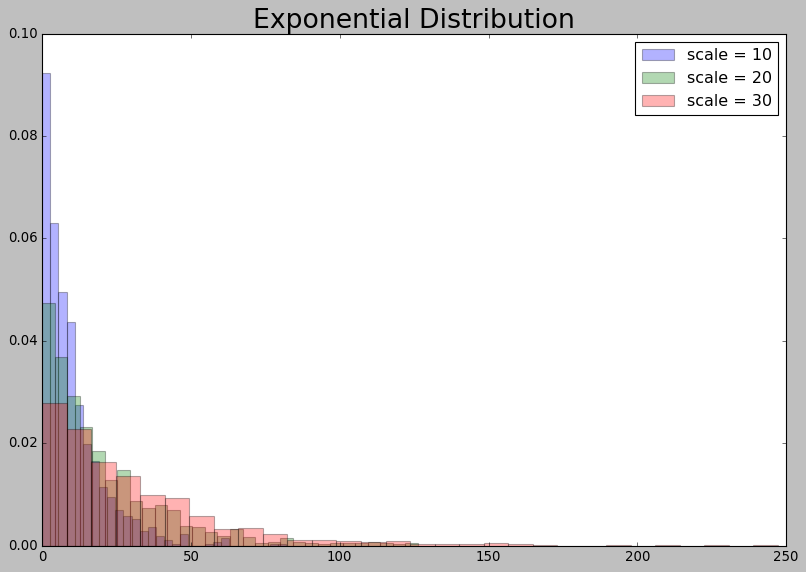

In [86]:
# Create 3 arrays of varying scale
# Scale is the inverse of rate so a scale of 10 means a rate of 1/10
exarray = rng.exponential(size=1000, scale=10)
exarray2 = rng.exponential(size=1000, scale=20)
exarray3 = rng.exponential(size=1000, scale=30)

# Create figure
fig, ax = plt.subplots(figsize = (12,8))

# Create Histogram for each array, set alpha to make translucent, density = True allows for y axis to be the same for all histograms
ax.hist(exarray, bins = 30, alpha = 0.3, label = "scale = 10", density = True)
ax.hist(exarray2, bins = 30, alpha = 0.3, label = "scale = 20", density = True)
ax.hist(exarray3, bins = 30, alpha = 0.3, label = "scale = 30", density = True)

# Title, legend and show graph
ax.set_title('Exponential Distribution', fontsize = '24')
ax.legend(loc='upper right')
plt.show;

### Probability Density Function of Exponential Distribution:

## ${\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}}$

In the above function, *$\lambda$* is the rate parameter (1/*β*) and *β* is the scale parameter while *e* is the exponent.

#### History of the Exponential Distribution

The Exponential Distribution is based off of the Gamma Function, which was first considered in the 1720's by Daniel Bernoulli and Christian Goldbach, with the first proof given by Charles Hermite in 1900 [X]


***

### 3.5 Gamma Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma

random.Generator.gamma(shape, scale=1.0, size=None)

The Gamma Distribution describes the probability of time between 2 or more events where events occur continuously and independently at a constant average rate. The Gamma Distribution is similar to the Exponential Distribution, with the difference being that the Gamma Distribution can track the probability of any number of events occuring from the previous event given a scale whereas the Exponential Distribution can only track the first event. A Gamma Distribution with a shape of 1 is identical to an Exponential Distribution of the same size and scale.

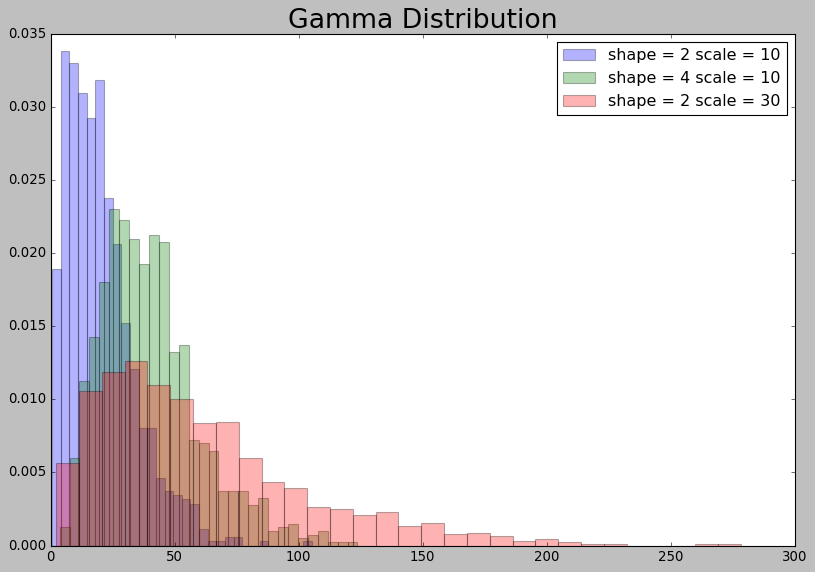

In [87]:
# Create 3 arrays of varying shape and scale
# Scale is the inverse of rate so a scale of 10 means a rate of 1/10
# Shape is the nth event that is to be tracked
garray = rng.gamma(shape=2, scale=10, size=1000)
garray2 = rng.gamma(shape=4, scale=10, size=1000)
garray3 = rng.gamma(shape=2, scale=30, size=1000)
fig, ax = plt.subplots(figsize = (12,8))

# Create Histogram for each array, set alpha to make translucent, density = True allows for y axis to be the same for all histograms
ax.hist(garray, bins = 30, alpha = 0.3, label = "shape = 2 scale = 10", density = True)
ax.hist(garray2, bins = 30, alpha = 0.3, label = "shape = 4 scale = 10", density = True)
ax.hist(garray3, bins = 30, alpha = 0.3, label = "shape = 2 scale = 30", density = True)
ax.set_title('Gamma Distribution', fontsize = '24')
ax.legend(loc='upper right')
plt.show();

### Probability Density Function of Gamma Distribution:

## ${\displaystyle f(x)={\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}x^{\alpha -1}e^{-\beta x}}{\displaystyle}$

In the above function, *β* is the scale parameter, *a* is the shape and the *Γ* is the gamma function

#### History of the Gamma Distribution

The Gamma Distribution is based off of the Gamma Function, which was first considered in the 1720's by Daniel Bernoulli and Christian Goldbach, with the first proof given by Charles Hermite in 1900 [X]

***
## 4. Seeds

<img src="https://gamespredator.com/wp-content/uploads/2020/08/minecraft-how-to-use-seeds-816x432.jpg" width="600px">

## 4.1 What are Seeds?

Seeds are **starting points** for random number generation. In numpy.random, seeds can be passed through **BitGenerators**. When seeds are used in numpy.random, the same output or sequence of outputs will occur each time the Generator is used.

In [31]:
seedrng = np.random.default_rng(123)
rfloat = seedrng.random()
rfloat

0.6823518632481435

Because of the seed used, the random number generated will always be 0.6823518632481435. This number is always the first iteration of the seed. Because the seed is assigned at the start of the cell, the first iteration of the seed is always used. When using the seed without calling the 

In [32]:
rfloat = seedrng.random()
rfloat

0.053821018802222675

The first time running the above cell will always be 0.053..., then 0.220... When assigning the 123 seed again and running the above cell, the same will happen.

## 4.2 Default Seeds in numpy.random

If no seed is given, numpy.random will obtain a seed from the entropy of the OS. The range of this possible seed is extremely large, thus making any reproduction of the seed extremely unlikely. It is possible to obtain the current seed given by the entropy of the OS by using the [**SeedSequence**](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence).entropy [X] function:

In [33]:
entropy = np.random.SeedSequence().entropy

print("Seed taken from this OS's entropy: ", entropy)

Seed taken from this OS's entropy:  208801234884906504930016040223124154279


It should be noted that SeedSequence obtains a seed form **multiple sources of entropy**. 
The above code can be useful when generating random values because those values can be reproduced later by using the seed that was produced by the entropy of the OS at the time (suppose an interesting result came up when running a random simulation that you would like to later show to others).

In [34]:
# Using entropy obtained from SeedSequence to use as a seed for random number generation
sq1 = np.random.SeedSequence()
print("Current entropy seed: ", sq1.entropy)

# Create an array of random numbers using the seed obtained from SeedSequence
array = np.random.default_rng(sq1.entropy).integers(0,100,10)
print(array, "\n")

# Repeating this does not get the same results as the entropy at the exact time the code is ran is different
sq2 = np.random.SeedSequence()
print("Current entropy seed: ", sq2.entropy)

array = np.random.default_rng(sq2.entropy).integers(0,100,10)
print(array, "\n")

# Passing the original entropy through SeedSequence generates the same results as the first iteration 
sq3 = np.random.SeedSequence(sq1.entropy)
print("First entropy seed: ", sq3.entropy)

array = np.random.default_rng(sq3.entropy).integers(0,100,10)
print(array)


Current entropy seed:  129458713303189055320549451924915124693
[80 24 37 28 43 57  7  3  3 19] 

Current entropy seed:  259661749674177217301000113173376332610
[30 80  0 76 32  2 12 36 20  8] 

First entropy seed:  129458713303189055320549451924915124693
[80 24 37 28 43 57  7  3  3 19]


***
## References

https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf BitGenerator paper

https://www.pcg-random.org/ PCG number generators

https://towardsdatascience.com/random-seed-numpy-786cf7876a5f Article on random numbers in numpy

https://www.freecodecamp.org/news/random-number-generator/ Article on Random Number Generators

https://www.datacamp.com/community/tutorials/probability-distributions-python Random Distributions

https://towardsdatascience.com/practical-guide-to-common-probability-distributions-in-machine-learning-487f6137625 More Random Distributions

http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/ARTICLES/mt.pdf MT19937 BitGenerator paper

https://numpy.org/doc/stable/reference/random/performance.html numpy.random recommendations, with notes with comparison of generators

https://numpy.org/doc/stable/reference/random/index.html numpy.random overview (new version)

https://numpy.org/doc/1.16/reference/routines.random.html numpy.random overview (old version)

https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator numpy.random BitGenerator overview

https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator numpy.random Generator overview

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform numpy.random Uniform Distribution overview

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal numpy.random Normal Distribution overview

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial numpy.random Binomial Distribution overview

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential numpy.random Exponential Distribution overview

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma numpy.random Gamma Distribution overview

Stewart, William J. (2011). Probability, Markov Chains, Queues, and Simulation: The Mathematical Basis of Performance Modeling. Princeton University Press. p. 105. ISBN 978-1-4008-3281-1. (Note on Probability Mass Functions)

https://www.sciencedirect.com/science/article/pii/S0315086004000400?via%3Dihub First use of "equiprobability" (Uniform)

https://mathworld.wolfram.com/NormalDistribution.html Normal Distribution

https://www.britannica.com/science/binomial-distribution Binomial Distribution History

Knuth, D. E. (1997). The Art of Computer Programming, Volume 1 (Fundamental Algorithms). Addison-Wesley. (Gamma Function 1900)

***
# End